# yt-dev

## 2/16/17

Let's take T2Sampler2D for example. It is called in `pixelization_routines.pyx` by the `pixelize_element_mesh` function. The `pixelize_element_mesh` function is called in `cartesian_coordinates.py` by the `pixelize` function of the `CartesianCoordinateHandler` class. Here is backtrace for call to `pixelize` when asking for a `SlicePlot` from an exodus data set:
```
slc = yt.SlicePlot(ds, 'z', ('all','group1_lin'), origin="native")
  /home/al007/yt/yt/visualization/plot_window.py(2017) SlicePlot()
-> return AxisAlignedSlicePlot(ds, normal, fields, *args, **kwargs)
  /home/al007/yt/yt/visualization/plot_window.py(1334) AxisAlignedSlicePlot.__init__()
-> PWViewerMPL.__init__()
  /home/al007/yt/yt/visualization/plot_window.py(670) PWViewerMPL.__init__()
-> PlotWindow.__init__(self, *args, **kwargs)
  /home/al007/yt/yt/visualization/plot_window.py(223) PlotWindow.__init__()
-> self._setup_plots()
  /home/al007/yt/yt/visualization/plot_window.py(758) PWViewerMPL._setup_plots()
-> self._recreate_frb()
  /home/al007/yt/yt/visualization/plot_window.py(282) PlotWindow._recreate_frb()
-> self._frb._get_data_source_fields()
  /home/al007/yt/yt/visualization/fixed_resolution.py(156) FixedResolutionBuffer._get_data_source_fields()
-> self[f]
  /home/al007/yt/yt/visualization/fixed_resolution.py(135) FixedResolutionBuffer.__getitem__()
-> buff = self.ds.coordinates.pixelize(...)
> /home/al007/yt/yt/geometry/coordinates/cartesian_coordinates.py(68) CartesianCoordinatehandler.pixelize()
-> index = data_source.ds.index
```

Inheritance pattern for some of this plotting stuff:

AxisAlignedSlicePlot <- PWViewerMPL <- PlotWindow <- ImagePlotContainer <- object

WindowPlotMPL <- ImagePlotMPL <- PlotMPL <- object

In [ ]:
import numpy as np

start_point = np.array([1, 1, 1])
end_point = np.array([2, 3, 4])
resolution = 10
lin_sample_points = np.zeros((resolution + 1, 3))
arc_length = np.zeros(resolution + 1)

lin_vec = end_point - start_point
lin_length = np.linalg.norm(lin_vec)
lin_inc = lin_vec / resolution
inc_length = np.linalg.norm(lin_inc)
lin_sample_points[0] = start_point
arc_length[0] = 0
for i in range(1, resolution + 1):
    lin_sample_points[i] = lin_sample_points[i-1] + lin_inc
    arc_length[i] = arc_length[i-1] + inc_length

print(lin_sample_points)
print(arc_length)

In [ ]:
print(lin_length)

# 2/17/17

yt : [WARNING  ] 2017-02-17 19:49:16,061 name_glo_var not found
yt : [WARNING  ] 2017-02-17 19:49:16,187 name_elem_var not found
yt : [INFO     ] 2017-02-17 19:49:16,189 Loading coordinates
yt : [INFO     ] 2017-02-17 19:49:16,192 Loading connectivity
yt : [INFO     ] 2017-02-17 19:49:16,205 Parameters: current_time              = 10000.0
yt : [INFO     ] 2017-02-17 19:49:16,205 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2017-02-17 19:49:16,207 Parameters: domain_left_edge          = [ -0.573 -11.5     0.   ]
yt : [INFO     ] 2017-02-17 19:49:16,210 Parameters: domain_right_edge         = [   6.303  126.5      1.   ]
yt : [INFO     ] 2017-02-17 19:49:16,211 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2017-02-17 19:49:16,213 Loading coordinates
yt : [INFO     ] 2017-02-17 19:49:16,215 Loading connectivity
yt : [WARNING  ] 2017-02-17 19:49:16,219 name_elem_var not found


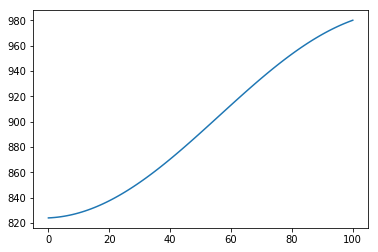

In [2]:
data_dir = "/home/lindsayad/Dropbox/moltres_output/"
import yt
ds = yt.load(data_dir + "020617_mod_heat_source_one_minus_beta_fission.e", step=-1)

from yt.geometry.coordinates.cartesian_coordinates import CartesianCoordinateHandler

handler = CartesianCoordinateHandler(ds)

arc_length, temp_values = handler.line_plot(('all', 'temp'), np.array([1., 0., 0.]), np.array([1., 100., 0.]), 100)
import numpy as np
import matplotlib.pyplot as plt
plt.plot(arc_length, temp_values)
plt.show()

In [3]:
if not False and True:
    print("Hey")

Hey


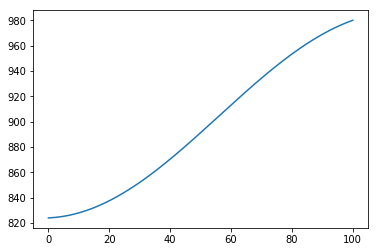

In [3]:
arc_length, temp_values = handler.line_plot([('all', 'temp')], np.array([1., 0., 0.]), np.array([1., 100., 0.]), 10000)
plt.plot(arc_length, temp_values)
plt.show()

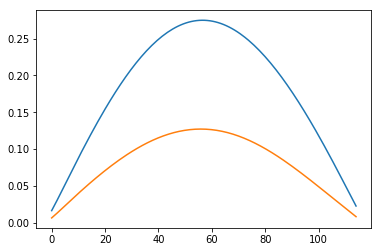

In [5]:
arc_length, group1_values = handler.line_plot([('all', 'group1_lin')], np.array([0., 0., 0.]), np.array([0., 114., 0.]), 10000)
arc_length, group2_values = handler.line_plot([('all', 'group2_lin')], np.array([0., 0., 0.]), np.array([0., 114., 0.]), 10000)
plt.plot(arc_length, group1_values, arc_length, group2_values)
plt.show()

In [6]:
r = (1, 1, 1)

In [7]:
x, y, z = r

In [8]:
print(x, y, z)

1 1 1
